In [20]:

import time
import glob
import numpy as np
import pandas as pd
import numpy as np
from sglm.features import gen_signal_df as gsd
from sglm.features import build_features as bf
from sglm.features import setup_model_fit as smf
from sglm.models import sglm_cv
from sglm import models
from sglm.visualization import visualize
from sglm.models import train_model
from sglm.models import eval
from sglm import features

fg2 = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-by_mouse-words-recons.csv')
fg2b = fg2.sort_values(['channel_name', 'Unnamed: 0']).groupby('channel_name').agg([np.mean, np.std, np.size]).stack(1).T

# fg2all = pd.read_csv('/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/coeffs/best_combined_coeffs/fig2-by_mouse-words-recons.csv')



In [22]:
fg2b[('gACH','ci_u')] = fg2b['gACH']['mean'] + 2*fg2b['gACH']['std']/np.sqrt(fg2b['gACH']['size'])
fg2b[('gACH','ci_l')] = fg2b['gACH']['mean'] - 2*fg2b['gACH']['std']/np.sqrt(fg2b['gACH']['size'])

fg2b[('rDA','ci_u')] = fg2b['rDA']['mean'] + 2*fg2b['rDA']['std']/np.sqrt(fg2b['rDA']['size'])
fg2b[('rDA','ci_l')] = fg2b['rDA']['mean'] - 2*fg2b['rDA']['std']/np.sqrt(fg2b['rDA']['size'])

<AxesSubplot:>

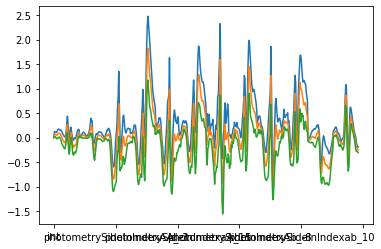

In [26]:
import matplotlib.pyplot as plt
# %matlplotlib notebook

plt.figure()
fg2b['gACH']['ci_u'].plot()
fg2b['gACH']['mean'].plot()
fg2b['gACH']['ci_l'].plot()

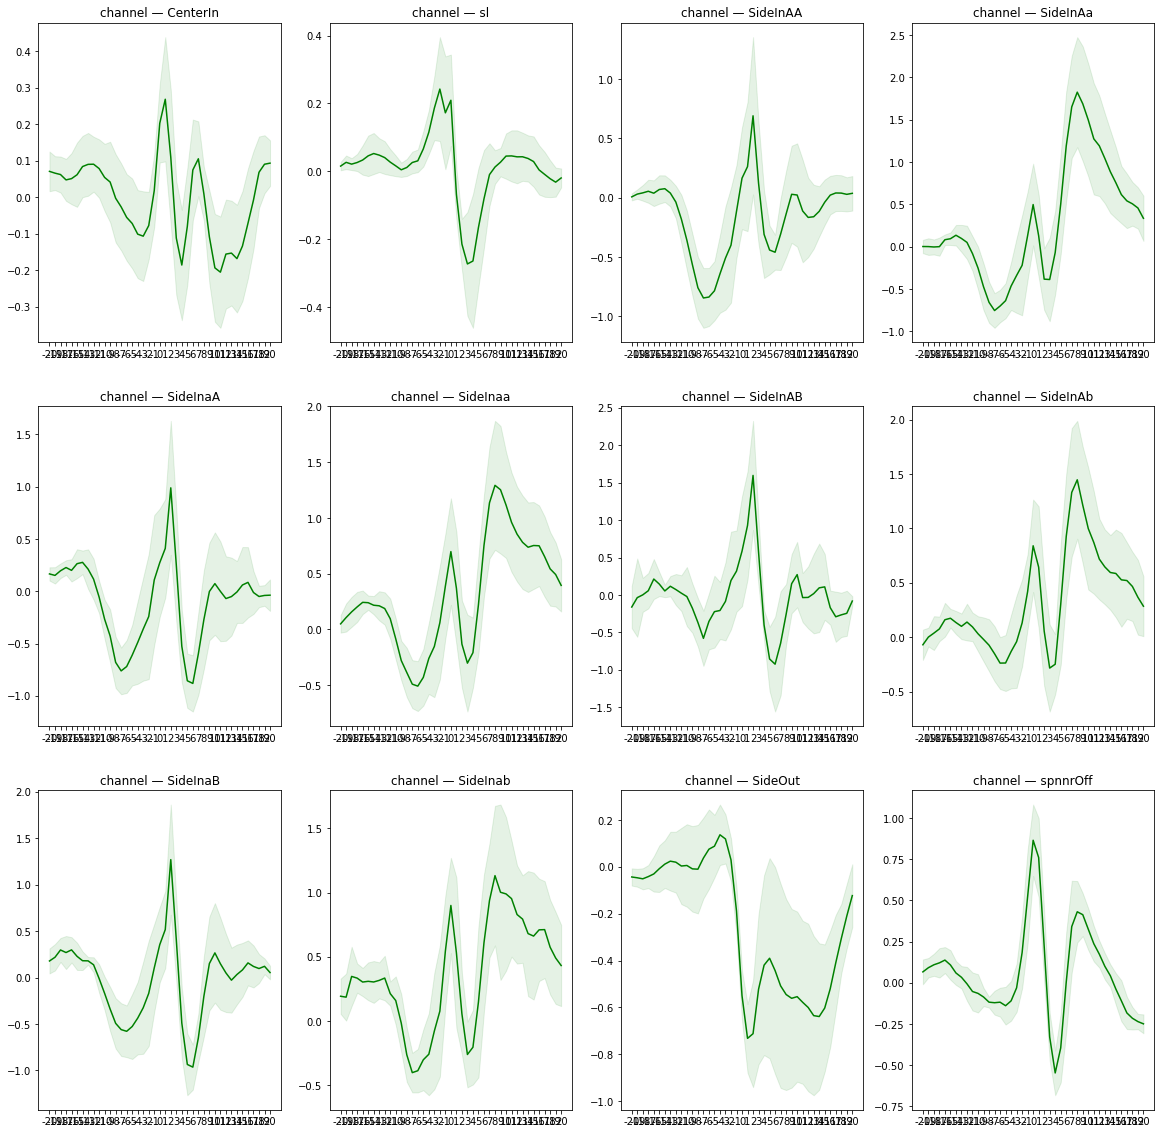

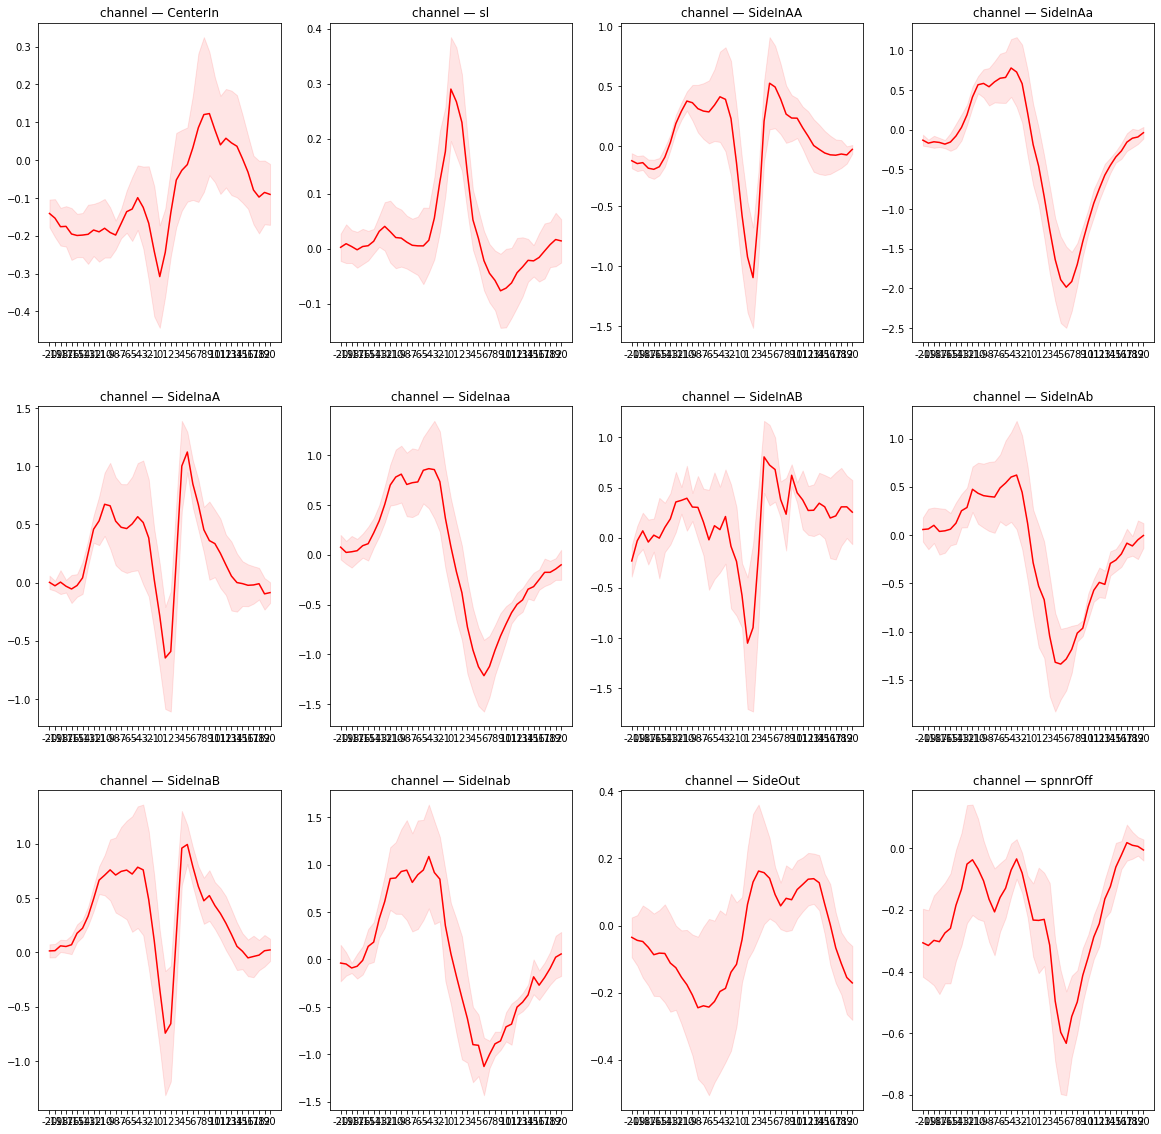

In [68]:
fg2b['base'] = fg2b.reset_index()['index'].str.split('_').apply(lambda x: x[0]).values
fg2b['sft'] = fg2b.reset_index()['index'].str.split('_').apply(lambda x: x[1] if len(x) > 1 else x[0]).values

bases = [_ for _ in fg2b['base'].unique() if _ != 'int']
num_rows = len(bases)//4 if len(bases)%4 == 0 else len(bases)//4 + 1

fig, ax = plt.subplots(num_rows, 4, figsize=(20,20))

i = 0
j = 0
channel = 'gACH'
for base in bases:
    base_name = base.replace('photometry', '').replace('Index', '')
    tmp = fg2b[fg2b['base'] == base]

    ax[i,j].plot(tmp['sft'], tmp[channel]['mean'], color=channel[0])
    ax[i,j].fill_between(tmp['sft'], tmp[channel]['ci_l'], tmp[channel]['ci_u'], color=channel[0], alpha=.1)
    ax[i,j].set_title(f'channel — {base_name}')

    if (j+1)%4 < j%4:
        i += 1
        j = 0
    else:
        j += 1

fig, ax = plt.subplots(num_rows, 4, figsize=(20,20))

i = 0
j = 0
channel = 'rDA'
for base in bases:
    base_name = base.replace('photometry', '').replace('Index', '')
    tmp = fg2b[fg2b['base'] == base]

    ax[i,j].plot(tmp['sft'], tmp[channel]['mean'], color=channel[0])
    ax[i,j].fill_between(tmp['sft'], tmp[channel]['ci_l'], tmp[channel]['ci_u'], color=channel[0], alpha=.1)
    ax[i,j].set_title(f'channel — {base_name}')

    if (j+1)%4 < j%4:
        i += 1
        j = 0
    else:
        j += 1

In [36]:
fg2b

channel_name                     gACH                      rDA                 \
                                 mean       std size      mean       std size   
int                          0.000000  0.000000  5.0  0.000000  0.000000  5.0   
photometryCenterInIndex_-20  0.070701  0.060655  5.0 -0.140986  0.041105  5.0   
photometryCenterInIndex_-19  0.065842  0.051780  5.0 -0.153392  0.056133  5.0   
photometryCenterInIndex_-18  0.062034  0.055025  5.0 -0.175968  0.055711  5.0   
photometryCenterInIndex_-17  0.047395  0.064153  5.0 -0.175070  0.059677  5.0   
...                               ...       ...  ...       ...       ...  ...   
spnnrOff_16                 -0.109057  0.138847  5.0 -0.022334  0.050937  5.0   
spnnrOff_17                 -0.182688  0.109492  5.0  0.018238  0.065454  5.0   
spnnrOff_18                 -0.214758  0.076265  5.0  0.009616  0.048687  5.0   
spnnrOff_19                 -0.235032  0.051795  5.0  0.006119  0.033838  5.0   
spnnrOff_20                 -0.248679  0.064029  5.0 -0.005647  0.038319  5.0   

channel_name                     gACH                 rDA           base  
                                 ci_u      ci_l      ci_u      ci_l       
int                          0.000000  0.000000  0.000000  0.000000  NaN  
photometryCenterInIndex_-20  0.124952  0.016449 -0.104220 -0.177751  NaN  
photometryCenterInIndex_-19  0.112155  0.019528 -0.103185 -0.203599  NaN  
photometryCenterInIndex_-18  0.111250  0.012818 -0.126139 -0.225797  NaN  
photometryCenterInIndex_-17  0.104775 -0.009985 -0.121694 -0.228447  NaN  
...                               ...       ...       ...       ...  ...  
spnnrOff_16                  0.015132 -0.233246  0.023225 -0.067894  NaN  
spnnrOff_17                 -0.084755 -0.280620  0.076782 -0.040305  NaN  
spnnrOff_18                 -0.146544 -0.282971  0.053163 -0.033931  NaN  
spnnrOff_19                 -0.188704 -0.281359  0.036385 -0.024146  NaN  
spnnrOff_20                 -0.191410 -0.305948  0.028626 -0.039920  NaN  

[493 rows x 11 columns]